#Análise de casos confirmados de COVID-19
##Casos a partir do dia 22 de janeiro de 2020.

In [1]:
import pandas as pd

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head(10)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,94,94,94,94,94,94,94,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,96,96,96,96,97,97,98,98,101,101,101,101,101,106,107,107,107
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,380292,392009,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007,500034,512293,524198,535705,546481,555537,565446,577338,589012,601713,613658,622934,631365,640147,652174,664799,678266,691235,702484,711325,723132,736609,751001,765002,779689,790818,798486,809728
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43270,43451,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845,44953,45152,45326,45503,45675,45862,45969,46119,46376,46671,46910,47154,47431,47552,47667,47877,48251,48643,49072,49400,49574,49901,50359,50850,51382,51925,52496,52677
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4019,4033,4040,4050,4063,4079,4091,4099,4104,4114,4118,4126,4135,4142,4152,4157,4166,4170,4177,4185,4190,4196,4198,4200,4204,4206,4212,4213,4217,4218,4218,4218,4220,4224,4227,4231,4232,4234,4235,4246


In [2]:
confirmed['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
261    West Bank and Gaza
262        Western Sahara
263                 Yemen
264                Zambia
265              Zimbabwe
Name: Country/Region, Length: 266, dtype: object

In [3]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [4]:
confirmed['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Yukon', 'Anhui', 'Beijing', 'Chongqing', 'Fujian',
       'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Martinique', 'Mayotte',
       'New Caledonia', 'Reunion', 'Sai

In [5]:
confirmed.set_index("Province/State").sort_index()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
Province/State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alberta,Canada,53.933300,-116.576500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13318,13476,13476,13476,13902,14066,14180,14310,14474,14474,14474,14474,15093,15093,15304,15415,15415,15415,15833,15957,16128,16274,16381,16381,16381,16739,16889,17032,17190,17343,17343,17343,17749,17909,18062,18235,18357,18357,18357,18935
Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Anhui,China,31.825700,117.226400,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
Aruba,Netherlands,12.521100,-69.968300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1848,1906,1975,1997,2006,2104,2211,2292,2358,2428,2449,2482,2589,2730,2819,2898,2994,3046,3060,3152,3328,3382,3460,3460,3551,3587,3665,3721,3756,3799,3832,3844,3872,3934,3963,3998,4038,4074,4079,4094
Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20677,21251,21668,22204,22729,23281,23875,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083,37591,37963,38253,38703,39121,39541,39899,40322,40766,41078,41498,41957
NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1933,1943,1946,1953,1958,1962,1976,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029,2029,2029,2030,2030,2031,2031,2034,2039,2040,2041,2041,2041


In [6]:
confirmed.set_index("Province/State").loc["New South Wales"]

Country/Region    Australia
Lat                -33.8688
Long                151.209
1/22/20                   0
1/23/20                   0
                    ...    
10/1/20                4231
10/2/20                4232
10/3/20                4234
10/4/20                4235
10/5/20                4246
Name: New South Wales, Length: 261, dtype: object

In [7]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Liechtenstein,47.140000,9.550000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,105,106,107,107,107,107,107,107,107,107,107,107,107,108,109,109,111,111,111,111,111,112,112,113,113,114,115,116,116,117,117,117,117,118,118,119,120,123,126,127
Cyprus,35.126400,33.429900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1467,1481,1483,1487,1488,1490,1495,1498,1502,1507,1509,1510,1511,1514,1517,1520,1523,1526,1534,1540,1548,1558,1565,1590,1600,1603,1618,1654,1663,1671,1684,1696,1713,1743,1755,1772,1789,1811,1824,1847
Seychelles,-4.679600,55.492000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,136,136,136,136,136,136,136,136,136,136,136,137,137,137,137,138,139,139,140,140,140,141,141,141,141,143,143,143,143,143,143,143,143,143,144,144,145,146,146,146
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Kazakhstan,48.019600,66.923700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,105408,105558,105684,105795,105872,105944,106032,106121,106225,106301,106361,106425,106498,106584,106661,106729,106803,106855,106920,106984,107056,107134,107199,107262,107307,107374,107450,107529,107590,107659,107723,107775,107833,107908,107979,108044,108106,108177,108236,108296
Mongolia,46.862500,103.846700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,301,301,301,301,304,306,306,310,310,310,310,310,310,310,311,311,311,311,311,311,311,311,311,312,312,313,313,313,313,313,313,313,313,313,313,313,313,313,314,315
Sweden,60.128161,18.643501,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,11,...,83958,83958,83958,83958,84379,84521,84532,84729,84985,84985,84985,85558,85707,85880,86194,86505,86505,86505,86505,87345,87575,87885,88237,88237,88237,88237,89436,89756,90289,90923,90923,90923,90923,92466,92863,93615,94283,94283,94283,94283
Cabo Verde,16.538800,-23.041800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3699,3745,3778,3852,3884,3970,4048,4125,4200,4275,4330,4358,4400,4473,4557,4651,4711,4813,4839,4904,4978,5063,5141,5186,5257,5281,5337,5412,5479,5628,5701,5771,5817,5900,6024,6126,6205,6296,6360,6433
India,20.593684,78.962880,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3387500,3463972,3542733,3621245,3691166,3769523,3853406,3936747,4023179,4113811,4204613,4280422,4370128,4465863,4562414,4659984,4754356,4846427,4930236,5020359,5118253,5214677,5308014,5400619,5487580,5562663,5646010,5732518,5818570,5903932,5992532,6074702,6145291,6225763,6312584,6394068,6473544,6549373,6623815,6685082


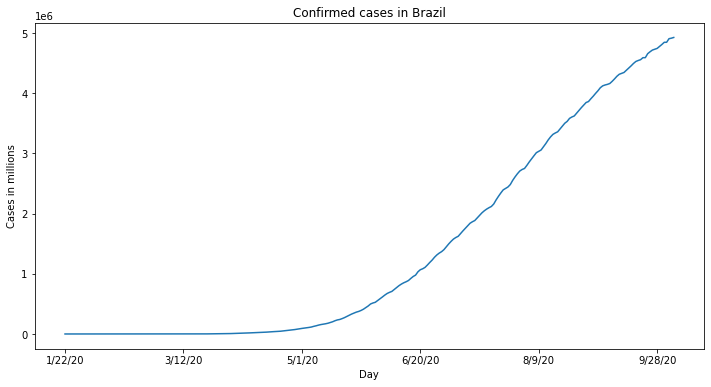

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
confirmed_by_country.loc["Brazil"][2:].plot() # excluding latitude and longitude. 
plt.ylabel('Cases in millions')
plt.xlabel('Day')
plt.title("Confirmed cases in Brazil")
plt.show()

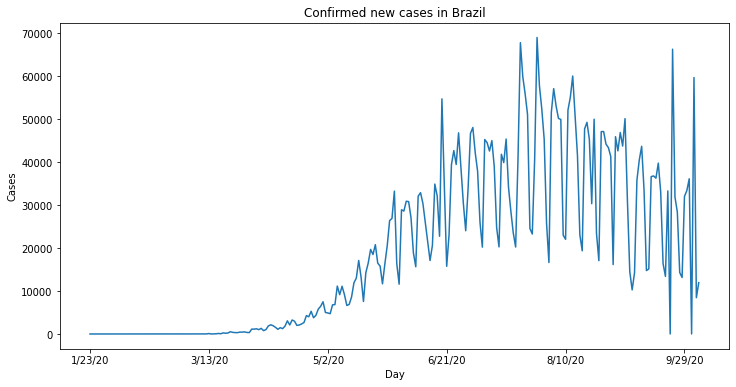

In [9]:
plt.figure(figsize=(12,6))
plt.ylabel('Cases')
plt.xlabel('Day')
plt.title("Confirmed new cases in Brazil")
new_cases_brazil = confirmed_by_country.loc["Brazil"][2:].diff().dropna()
new_cases_brazil.plot()
plt.show()

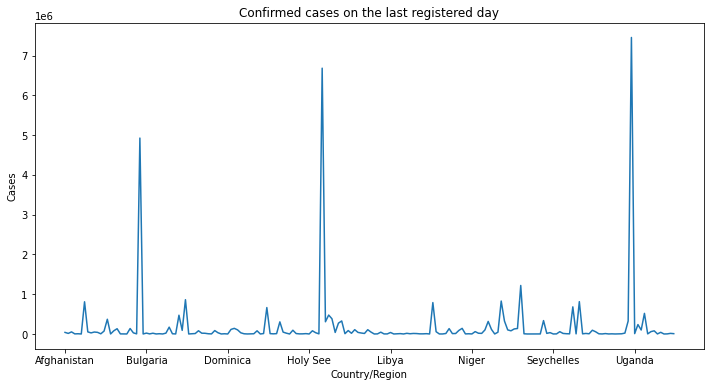

In [10]:
last_date = confirmed_by_country.iloc[:,-1]
plt.figure(figsize=(12,6))
plt.ylabel('Cases')
plt.title("Confirmed cases on the last registered day")
last_date.plot()
plt.show()

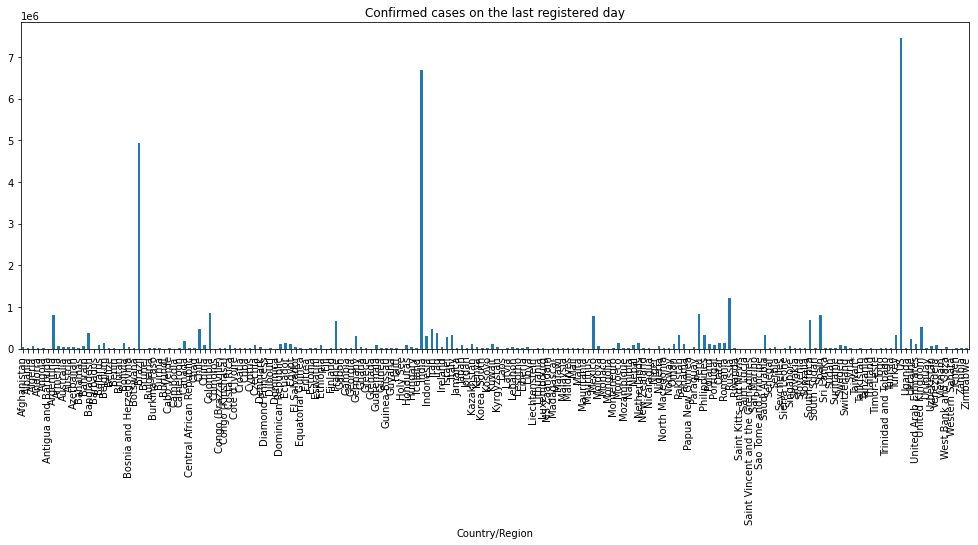

In [11]:
last_date = confirmed_by_country.iloc[:,-1]
plt.figure(figsize=(17,6))
plt.title("Confirmed cases on the last registered day")
last_date.plot(kind='bar')
plt.show()

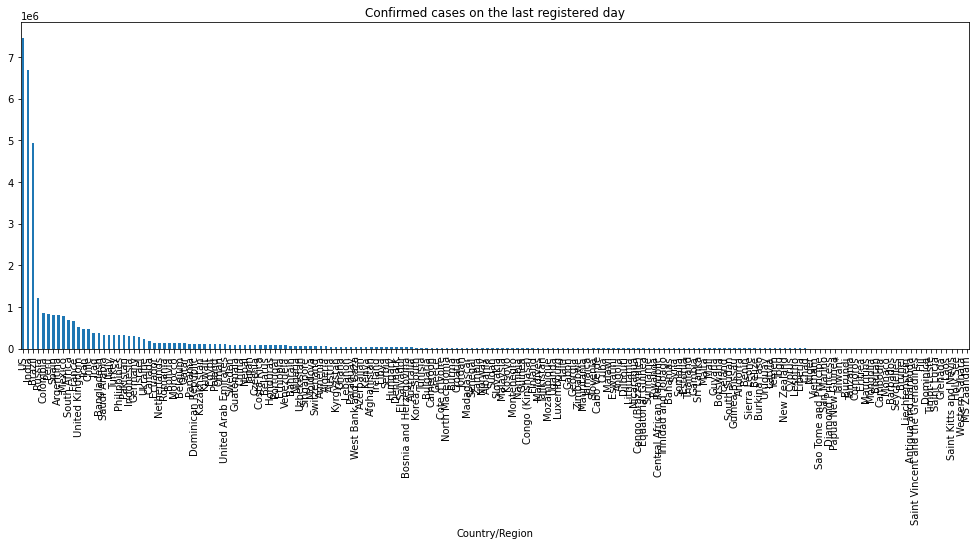

In [12]:
last_date = confirmed_by_country.iloc[:,-1]
plt.figure(figsize=(17,6))
plt.title("Confirmed cases on the last registered day")
last_date.sort_values(ascending=False).plot(kind='bar')
plt.show()

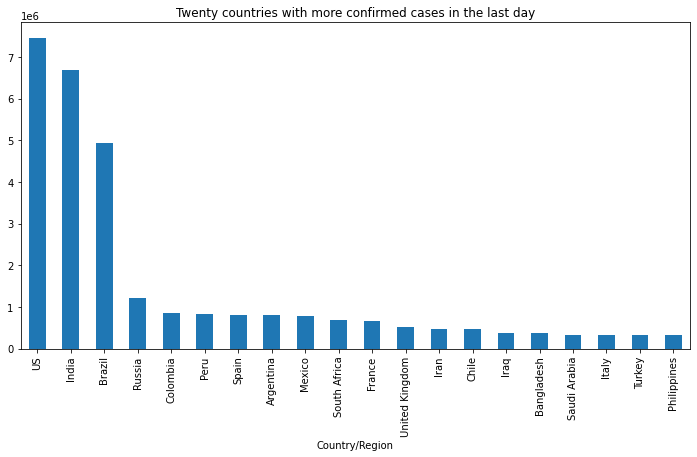

In [13]:
last_date = confirmed_by_country.iloc[:,-1]
plt.figure(figsize=(12,6))
plt.title("Twenty countries with more confirmed cases in the last day")
last_date.sort_values(ascending=False)[0:20].plot(kind='bar')
plt.show()

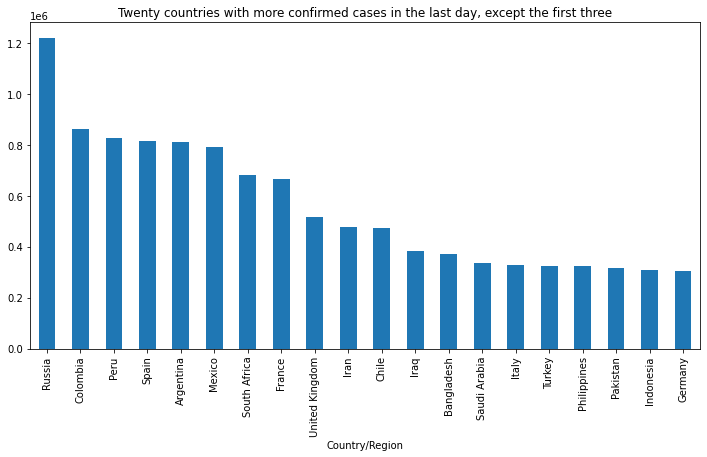

In [14]:
last_date = confirmed_by_country.iloc[:,-1]
plt.figure(figsize=(12,6))
plt.title("Twenty countries with more confirmed cases in the last day, except the first three")
last_date.sort_values(ascending=False)[3:23].plot(kind='bar')
plt.show()

In [15]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364,367,370,370,373,375,377,380,384,387,388,389,392,396,400
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,105,106,107,107,108,109,112,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154,155,159,162,167,171,174,176,179,183,185,189,193,195,199


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576,32576,32610,32619,32619,32635,32642,32642,32746,32789,32842,32842,32842,32852,32879
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995,7042,7139,7239,7309,7397,7397,7629,7732,7847,8077,8342,8536,8675,8825
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30157,30436,30717,30978,31244,31493,31746,32006,32259,32481,32745,32985,33183,33379,33562,33723,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180,35307,35428,35544,35654,35756,35860,35962,36063,36174,36282,36385,36482,36578,36672
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,893,902,902,902,908,908,909,909,928,928,928,934,934,938,938,943,943,943,945,945,1054,1054,1164,1164,1164,1199,1199,1203,1203,1263,1263,1263,1265,1265,1432,1432,1540,1540,1540,1615
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1335,1028,1041,1063,1071,1084,1115,1144,1167,1192,1198,1215,1215,1245,1277,1288,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449,1462,1473,1503,1554,1639,1707,1813,1833,1941,2082,2215,2436,2577,2591


In [16]:
def latest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

In [17]:
comparation = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined_comparation = pd.concat(comparation, axis=1)
combined_comparation.columns = ["Confirmed", "Deaths", "Recovered"]
combined_comparation.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,39422,1466,32879
Albania,14410,400,8825
Algeria,52270,1768,36672
Andorra,2370,53,1615
Angola,5530,199,2591


##Letality rate

In [18]:
sum_up = combined_comparation.sum()
letality_rate = sum_up["Deaths"] / sum_up["Confirmed"]
print(letality_rate * 100, '%')

2.9426895948089125 %


In [19]:
letality_rate = combined_comparation["Deaths"] / combined_comparation["Confirmed"] * 100
recovery_rate = combined_comparation["Recovered"] / combined_comparation["Confirmed"] * 100
combined_comparation["recovery_rate"] = recovery_rate
combined_comparation["letality_rate"] = letality_rate
combined_comparation.head()

,Confirmed,Deaths,Recovered,recovery_rate,letality_rate
Country/Region,,,,,
Afghanistan,39422,1466,32879,83.402669,3.718736
Albania,14410,400,8825,61.242193,2.775850
Algeria,52270,1768,36672,70.158791,3.382437
Andorra,2370,53,1615,68.143460,2.236287
Angola,5530,199,2591,46.853526,3.598553


In [20]:
combined_comparation.sort_values("letality_rate", ascending=False).head(10)

,Confirmed,Deaths,Recovered,recovery_rate,letality_rate
Country/Region,,,,,
Yemen,2041,592,1323,64.821166,29.005390
MS Zaandam,9,2,0,0.000000,22.222222
Italy,327586,36002,232681,71.028982,10.990091
Mexico,789780,81877,670034,84.838056,10.367064
Western Sahara,10,1,8,80.000000,10.000000
Ecuador,141339,11681,120511,85.263798,8.264527
United Kingdom,518222,42459,2409,0.464859,8.193207
Belgium,132203,10078,19712,14.910403,7.623125
Chad,1223,86,1075,87.898610,7.031889


In [21]:
sum_up = combined_comparation.loc["Brazil"]
letality_rate = sum_up["Deaths"] / sum_up["Confirmed"]
print(letality_rate * 100, '%')

2.9768216859963044 %


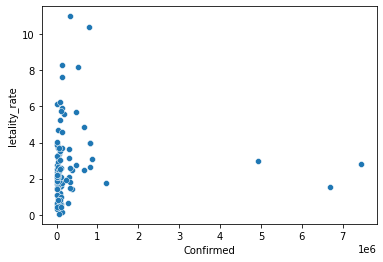

In [22]:
import seaborn as sns
sns.scatterplot(data = combined_comparation.query("Confirmed > 10000"), x="Confirmed", y="letality_rate")

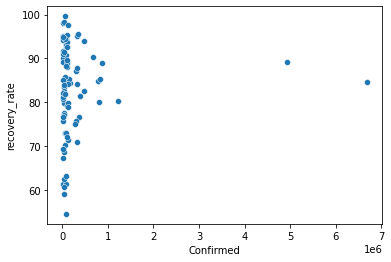

In [23]:
sns.scatterplot(data = combined_comparation.query("Confirmed > 10000 and recovery_rate > 50"), x="Confirmed", y="recovery_rate")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


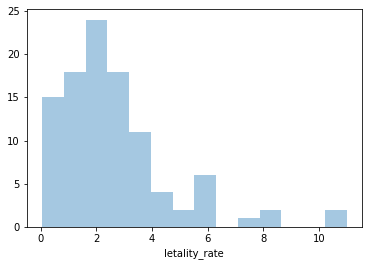

In [24]:
sns.distplot(combined_comparation.query("Confirmed > 10000")["letality_rate"], kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


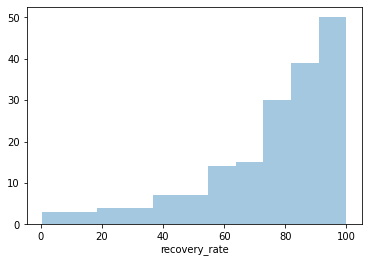

In [25]:
sns.distplot(combined_comparation.query("Recovered > 50")["recovery_rate"], kde=False)

In [26]:
combined_comparation.sort_values("letality_rate").query("Confirmed > 10000 and letality_rate > 1").head(10)

,Confirmed,Deaths,Recovered,recovery_rate,letality_rate
Country/Region,,,,,
Belarus,80696,862,75303,93.316893,1.068207
Malaysia,12813,137,10340,80.699290,1.069227
Namibia,11654,125,9451,81.096619,1.072593
Costa Rica,81129,987,49703,61.264160,1.216581
Madagascar,16570,233,15601,94.152082,1.406156
Tunisia,22230,321,5032,22.636077,1.443995
Bangladesh,370132,5375,283182,76.508381,1.452185
Saudi Arabia,336766,4898,322055,95.631685,1.454422
Azerbaijan,40788,598,38587,94.603805,1.466117


https://www.worldometers.info/coronavirus/coronavirus-death-rate/


In [28]:
def latest_by_country_at (data, date):
  return data.groupby("Country/Region").sum()[date]

In [36]:
informations = [latest_by_country_at(confirmed,'2/8/20'), latest_by_country_at(deaths, '2/20/20')]
combined_12_days = pd.concat(informations, axis=1)
combined_12_days.columns = ["Confirmed", "Deaths"]

sum_up = combined_12_days.loc["China"]
letality = sum_up["Deaths"] / sum_up["Confirmed"]
print(letality * 100)


6.079208996577389
